In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

In [2]:
stock_symbol = "RELIANCE.NS"
data = yf.download(stock_symbol, period="3mo", progress=False)


In [3]:
data.head()


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-02-20,2445.000000,2449.750000,2410.100098,2414.399902,2414.399902,4078245
2023-02-21,2424.000000,2446.800049,2412.350098,2434.100098,2434.100098,6143298
2023-02-22,2425.949951,2430.000000,2375.050049,2378.899902,2378.899902,5087729
2023-02-23,2378.000000,2394.750000,2361.350098,2367.500000,2367.500000,4546655
2023-02-24,2372.000000,2396.149902,2368.000000,2383.699951,2383.699951,4353814


In [4]:
# Calculate SMA
sma_period = 3
data['SMA'] = data['Close'].rolling(sma_period).mean()

# Calculate EMA
ema_period = 3
data['EMA'] = data['Close'].ewm(span=ema_period, adjust=False).mean()

In [5]:
data.head()


,Open,High,Low,Close,Adj Close,Volume,SMA,EMA
Date,,,,,,,,
2023-02-20,2445.000000,2449.750000,2410.100098,2414.399902,2414.399902,4078245,NaN,2414.399902
2023-02-21,2424.000000,2446.800049,2412.350098,2434.100098,2434.100098,6143298,NaN,2424.250000
2023-02-22,2425.949951,2430.000000,2375.050049,2378.899902,2378.899902,5087729,2409.133301,2401.574951
2023-02-23,2378.000000,2394.750000,2361.350098,2367.500000,2367.500000,4546655,2393.500000,2384.537476
2023-02-24,2372.000000,2396.149902,2368.000000,2383.699951,2383.699951,4353814,2376.699951,2384.118713


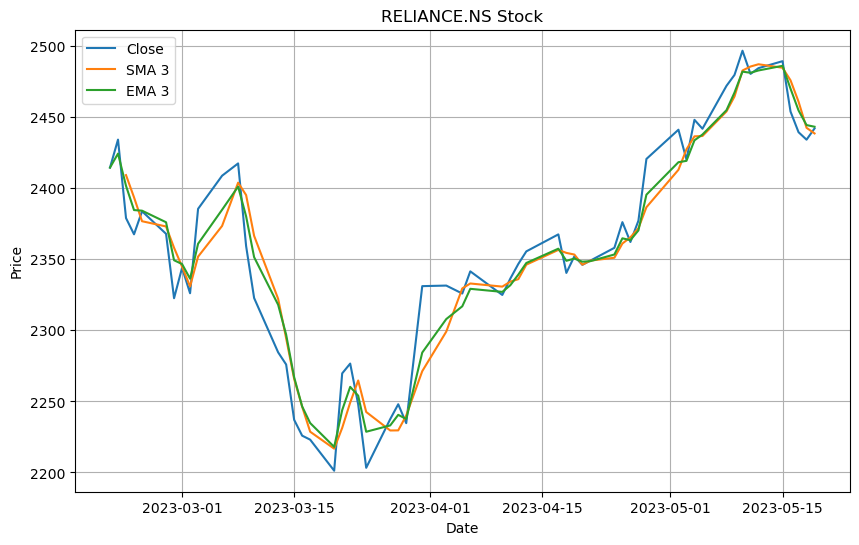

In [6]:
# Plotting the data
plt.figure(figsize=(10, 6))
plt.plot(data['Close'], label='Close')
plt.plot(data['SMA'], label=f'SMA {sma_period}')
plt.plot(data['EMA'], label=f'EMA {ema_period}')
plt.title(f"{stock_symbol} Stock")
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()